## Configuracion inicial

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\MICHU\AppData\R

## Bi-gramas

- Parejas de palabreas que ocurren consecutivas

In [2]:
# Crear bi-gramas
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

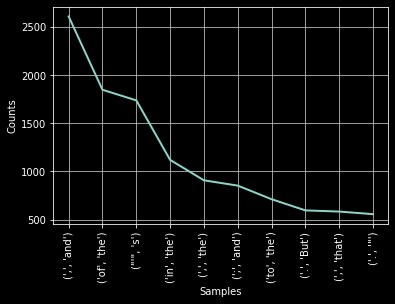

In [3]:
# Plotear bi-gramas
plt.style.use('dark_background')
fdist.plot(10)

## Filtrado de bi-gramas

- Sin embargo, observamos que los bi-gramas mas comunes no representan realmente frases o estructuras lexicas de interes.

- Tal vez, aplicar algun tipo de filtro nos permita ver estructuras mas relevantes.

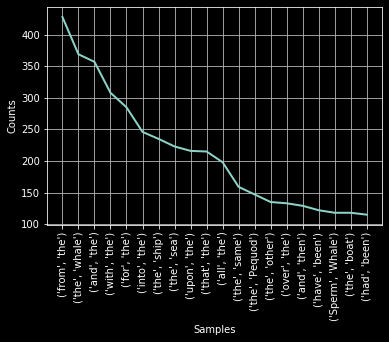

In [4]:
# Filtrar los bi-gramas para que sean mayores a dos caracteres
treshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams 
                    if len(bigram[0])>treshold and len(bigram[1])>treshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Tri-gramas

In [5]:
# Importar ngrams y crear un tri-grama
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

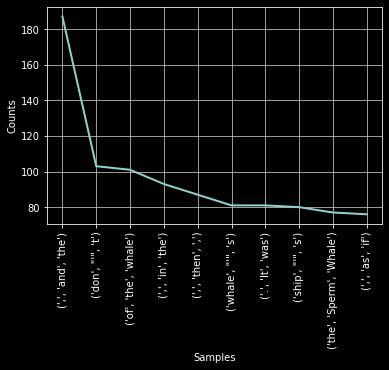

In [6]:
# Plotear tri-gramas
fdist.plot(10)

## Collocations (Colocaciones)

- Son secuencias de palabrass que suelen ocurrir en textos o conversaciones con una frecuencia inusualmente alta.

- Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra.

In [7]:
# Crear y fiiltrar el bi-grama para que sean mayores a dos caracteres
md_bigrams = list(bigrams(text1))

treshold = 2
# Distribucion de bi-gramas
filteres_bigrams = [bigram for bigram in md_bigrams 
                    if len(bigram[0])>treshold and len(bigram[1])>treshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
# Distribucion de palabras
filtered_words = [word for word in text1 if len(word)>treshold]
filtered_word_dist = FreqDist(filtered_words)

In [8]:
# Crear un dataframe con la informacion de los bi-gramas
df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df.head(10)

bi_gram     word_0    word_1  bi_gram_freq  word_0_freq  \
0  (lingering, there)  lingering     there             1            8   
1  (seamen, declared)     seamen  declared             1           43   
2      (rolling, and)    rolling       and             2           35   
3  (special, purpose)    special   purpose             1           15   
4      (quitted, the)    quitted       the             3            4   
5      (minutes, ago)    minutes       ago             1           21   
6       (CLOSES, HIS)     CLOSES       HIS             1            1   
7      (seeing, Ahab)     seeing      Ahab             1           28   
8        (must, kiss)       must      kiss             1          282   
9        (his, other)        his     other             6         2459   

   word_1_freq  
0          715  
1           14  
2         6024  
3           39  
4        13721  
5           36  
6           17  
7          501  
8            2  
9          412

## Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [15]:
# Creando metrica PMI
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis=1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df.head()

bi_gram     word_0    word_1  bi_gram_freq  word_0_freq  \
0  (lingering, there)  lingering     there             1            8   
1  (seamen, declared)     seamen  declared             1           43   
2      (rolling, and)    rolling       and             2           35   
3  (special, purpose)    special   purpose             1           15   
4      (quitted, the)    quitted       the             3            4   

   word_1_freq        PMI  log(bi_gram_freq)  
0          715 -12.481799           0.000000  
1           14  -9.233620           0.000000  
2         6024 -16.685789           1.000000  
3           39  -9.192293           0.000000  
4        13721 -14.159136           1.584963

In [14]:
# Mostrar el data frame en conden descendente
df.sort_values(by='PMI', ascending=False)

bi_gram         word_0          word_1  \
23968       (saplings, mimicking)       saplings       mimicking   
26396          (HORIZONTAL, TAIL)     HORIZONTAL            TAIL   
30950    (methods, intelligently)        methods   intelligently   
26379        (scrabble, scramble)       scrabble        scramble   
52449              (spicin, ',--)         spicin            ',--   
67594                (VON, TROIL)            VON           TROIL   
52450     (Pottowottamie, Sachem)  Pottowottamie          Sachem   
14686        (marsh, perpetuates)          marsh     perpetuates   
40574           (wery, woracious)           wery       woracious   
15951       (officio, professors)        officio      professors   
16384   (eminent, tremendousness)        eminent  tremendousness   
52464             (WALTER, CANNY)         WALTER           CANNY   
28435            (REPUBLICA, DEL)      REPUBLICA             DEL   
47329             (Fata, Morgana)           Fata         Morgana   
37518      (needing, supervision)        needing     supervision   
19800              (SMALL, SIZED)          SMALL           SIZED   
30957          (103, Measurement)            103     Measurement   
12232   (Wretched, entertainment)       Wretched   entertainment   
47417   (unsignifying, pettiness)   unsignifying       pettiness   
7909         (FINALLY, DESTROYED)        FINALLY       DESTROYED   
64257           (returne, againe)        returne          againe   
58513      (unmanageably, winces)   unmanageably          winces   
35109       (CONTESTED, ELECTION)      CONTESTED        ELECTION   
16310             (Booble, Alley)         Booble           Alley   
67605      (lassitude, overtakes)      lassitude       overtakes   
40703                 (Fogo, Von)           Fogo             Von   
40731         (chaotic, bundling)        chaotic        bundling   
12053            (Silly, Mansoul)          Silly         Mansoul   
26116              (OAKES, SMITH)          OAKES           SMITH   
37602  (ragamuffin, rapscallions)     ragamuffin    rapscallions   
...                           ...            ...             ...   
52097                 (into, and)           into             and   
25055                  (men, the)            men             the   
15787                 (and, upon)            and            upon   
14222               (whales, the)         whales             the   
34281                  (and, but)            and             but   
49778                 (Ahab, the)           Ahab             the   
42020                  (and, are)            and             are   
41205                 (like, and)           like             and   
21224                 (this, and)           this             and   
12060                (Whale, the)          Whale             the   
30915                  (two, the)            two             the   
63625                 (the, then)            the            then   
31694                  (his, was)            his             was   
57253                (still, the)          still             the   
65050                (there, and)          there             and   
11192                 (long, the)           long             the   
4208                  (boat, the)           boat             the   
54556                 (such, the)           such             the   
50245                  (the, all)            the             all   
7869                 (these, the)          these             the   
16560                 (the, over)            the            over   
19792                (would, the)          would             the   
455                  (the, would)            the           would   
43644                (whale, the)          whale             the   
3471                  (ship, the)           ship             the   
39030                  (man, the)            man             the   
48553                 (some, the)           some             the   
66665         

In [16]:
# Ploteando nuestro data frame
fig = px.scatter(x=df['PMI'].values, y=df['log(bi_gram_freq)'].values, color=df['PMI']+df['log(bi_gram_freq)'], hover_name=df['bi_gram'].values, width=600, height=600, labels= {'x': 'PMI', 'y': 'Log(Bigram frequency)'})
fig.show()

## Medidas pre-construidas en NLTK

In [17]:
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures() # Importar metricas, tales como 'PMI'
finder = BigramCollocationFinder.from_words(text1) # Encontrar colocaciones

In [18]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

## Textos en espanol

In [19]:
# Descarcar corpus en espanol
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()

[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\MICHU\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]

In [21]:
# Transformar a un unico array
flatten_corpus = [words for length in corpus for words in length]
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [22]:
# Encontrar colocaciones
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]